# INTRODUCTION

This is an step-by-step introduction on how to obtain a clean data set for the machine learning analysis. The first step is to start importing the packages. We will start by using the magic function (%matplotlib inline), which allows to plot inline. 
Press 'Shift + Enter' to run individual cells.

In [1]:
%matplotlib inline

In order to apply machine learning algorithms we must have a clean data set. Here, to deal with data manipulation, we will use 'numpy' and 'pandas'. For more check the corresponding documentation: https://pandas.pydata.org/pandas-docs/stable/tutorials.html, https://www.tutorialspoint.com/numpy/index.htm. Many other pages provide a comprehensive introduction. For plotting we will use Matplotlib (see for example http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html).

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 30)
from IPython.display import display, HTML

## Read data
Depending on the problem, the data can be spread in many files. In the example we are illustrating here we have only one data file in CSV format. To read the and store the data we will use 'Pandas'. 

We have created a directory named 'data' and stored the data file there. 

In [3]:
fname = 'data/UCI_Credit_Card.csv'

df = pd.read_csv(fname)
if not os.path.isfile(fname):
    raise FileNotFoundError

After having make sure we have the file, is time to check what contains our data

In [4]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [5]:
df.columns

Index([u'ID', u'LIMIT_BAL', u'SEX', u'EDUCATION', u'MARRIAGE', u'AGE',
       u'PAY_0', u'PAY_2', u'PAY_3', u'PAY_4', u'PAY_5', u'PAY_6',
       u'BILL_AMT1', u'BILL_AMT2', u'BILL_AMT3', u'BILL_AMT4', u'BILL_AMT5',
       u'BILL_AMT6', u'PAY_AMT1', u'PAY_AMT2', u'PAY_AMT3', u'PAY_AMT4',
       u'PAY_AMT5', u'PAY_AMT6', u'default.payment.next.month'],
      dtype='object')

## Explore data
Now is time to have fun by exploring the data. Is important to plot the different variables and check their distributions and check also for hiden trends.

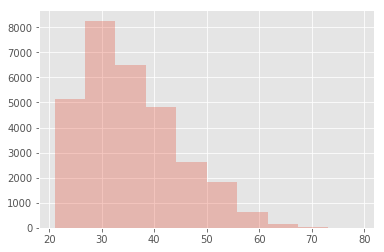

In [6]:
fig = plt.figure()
plt.hist(df['AGE'], alpha=0.3)
#plt.hist(df['SEX'], alpha=0.3)
#plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
#fig.savefig('plots/payment_hist.png')
plt.show()


To check how many people in the data set have completed payment default, we will plot them. 1 == yes, 0 == no

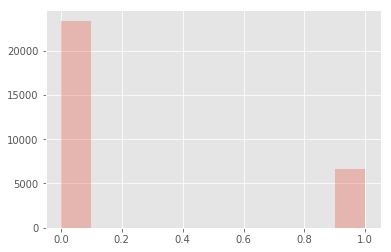

In [7]:
fig = plt.figure()
plt.hist(df['default.payment.next.month'], alpha=0.3)
plt.show()

From the plot can be seen that the majority is not falling into the payment defult. Let's check percentages of each category.  

In [8]:
#df.iloc[1:3]; df

#miss_val = df.isnull().sum()
default = 1
non_default = 0
miss = df.ID.isna().sum()
loc_1=len(df.AGE) 
loc_1

#categorizing non-default clients, default clients
#since the last column is named default.payment.next.month and can cause problems, we are going to rename it

#df[df.PAY_0 >=0] #mask type
df = df.rename(index=str, columns={"default.payment.next.month": "Status"})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Status
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [13]:
non_def = df[df.Status >= 0] #masks the clients based on their payment status

### Boolean Indexing
In this problem is important to filter clients based on some criteria. For exapmle, if we would like to select clients who are non-default (Status = 0) and Female, to compare with the same but for Male. Using https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html with boolean indexing is useful

In [97]:
female_nondef = df.loc[(df['Status'] == 0) & (df['SEX'] == 2)]
female_def = df.loc[(df['Status'] == 1) & (df['SEX'] == 2)]
n_tot = df['Status'].count()
print(len(df))
#some statistics about the number of females who pay and not-pay loans
#print(n_clients)
n_Fdef = female_def['Status'].count()
n_Fnodef = female_nondef['Status'].count()
perc_Fdef = 100 * n_Fdef / len(df)
perc_Fnodef = 100 * n_Fnodef / len(df)
print(perc_Fdef, perc_Fnodef)

30000
(12, 47)


We see a small fraction of F. 

### Categorize Clients
Clients are categorized as payment default and non payment default. As a second step, the clients will be sub-categorized trying to understand when do they stop paying or if they start paying late.

## Missing values
The data files many time have missing values or bad values. Checks are necessary and depending on the problem, one can drop or replace them with their mean, closest neighbour etc. 

## Linear Regression
The first step is to define the feature variables which will be used for the model. Add here some material about machine learning

In [93]:
feature_col = df.drop('Status', 1)
labels = df['Status']

## Spliting the data 
For our training we will split 25 % for training and 75 % for training. 

In [94]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(feature_col, labels, test_size=0.25, random_state = 0)

## Decision Trees: Classification Tree

AdaBoost - shortcut for adaptive boosting. Adaptive boosting and Gradient boosting are boosting algorithms. They convert a set of weak learners into a single strong learner. They differ on how they create the weak learners during the iterative process. 

Let's use a decision tree classifier, which with default parameters to get an idea of the performance. 

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(features_train, labels_train)
y_pred = dt.predict(features_test)

To estimate the performance we will use the area under curve (AUC), used as evaluation matrix. Method which is useful for binary classification problems.

In [89]:
from sklearn.metrics import auc, roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.6120377471029311

### Parameters: max depth
One of the parameters to be tuned is the maximum depth. This is a parameter which determines how deep a tree can be. We will give a set of parameters from n_min to n_max and check the performace. For this we will use NumPy linspace. At the end we need to compare the performance in

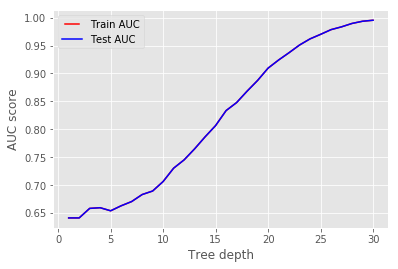

In [96]:
n_max_depth = np.linspace(1, 30, 30, endpoint = True)

train_results = []
test_results = []

for max_depth in n_max_depth:
    dt = DecisionTreeClassifier(max_depth = max_depth)
    dt.fit(features_train, labels_train)
    
    train_pred = dt.predict(features_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(features_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_test, y_pred)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_max_depth, train_results, 'r',label='Train AUC')
line2, = plt.plot(n_max_depth, test_results, 'b',label='Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()
    